<a href="https://colab.research.google.com/github/FabianaHernande/exercicios_bd_womakers/blob/main/%5BDesafio_e_Orienta%C3%A7%C3%B5es%5D_Frequ%C3%AAncias_e_Medidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
file_id = "1HzvK9Epq4X_5dafa2R7k4EbuVuIx-Moq"

In [3]:
url = f"https://drive.google.com/uc?id={file_id}&export=download"

In [5]:
!pip install pandas

In [6]:
!pip install numpy
!pip install matplotlib


In [7]:
# bibliotecas base
import pandas as pd
import numpy as np
# biblioteca para visualizacao de dados
import matplotlib.pyplot as plt


In [10]:
#importando o csv

df_netflix = pd.read_csv(url)

In [11]:
# visualizando o Df

df_netflix

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show
...,...,...,...,...,...,...,...,...,...,...,...,...
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie
5835,70157452,Dinner for Five,NaN,NaN,United States,"February 4, 2008",2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show


Tarefas:
1. Exploração inicial:

● Quantas linhas e colunas tem o dataset?

In [12]:
# linhas e colunas
df_netflix.shape

(5837, 12)

● Quais são os tipos das variáveis e se há valores ausentes?

In [13]:
# tipos de variáveis
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


In [14]:
# tipos de variáveis
df_netflix.dtypes

,0
show_id,int64
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object
listed_in,object


In [15]:
# valores ausentes
df_netflix.isnull().sum()

,0
show_id,0
title,0
director,1901
cast,556
country,427
date_added,642
release_year,0
rating,10
duration,0
listed_in,0


2. Análises de frequência:

● Qual a proporção de filmes vs. séries no catálogo?

In [16]:
# quantidade de filmes e séries
df_filmes_series = df_netflix["type"].value_counts()
df_filmes_series

,count
type,
Movie,3939
TV Show,1898


In [17]:
# proporção filmes x séries
df_proporcao = df_netflix["type"].value_counts(normalize=True) * 100
df_proporcao

,proportion
type,
Movie,67.483296
TV Show,32.516704


● Qual o gênero mais frequente?

In [18]:
# gênero mais frequente
df_generos = df_netflix["listed_in"].value_counts()
df_generos

,count
listed_in,
Documentaries,297
Stand-Up Comedy,265
"Dramas, International Movies",238
"Dramas, Independent Movies, International Movies",170
"Comedies, Dramas, International Movies",157
...,...
"Action & Adventure, Children & Family Movies, Dramas",1
"TV Comedies, TV Sci-Fi & Fantasy, Teen TV Shows",1
"Crime TV Shows, TV Action & Adventure, TV Comedies",1


3. Análises estatísticas:

● Qual o filme mais curto e mais longo?

In [19]:
# Data Frame só com os Movies
df_filmes = df_netflix[df_netflix["type"] == "Movie"]
df_filmes

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,"November 29, 2019",2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,"November 29, 2019",2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie
...,...,...,...,...,...,...,...,...,...,...,...,...
5831,70154110,Even the Rain,Icíar Bollaín,"Luis Tosar, Gael García Bernal, Juan Carlos Ad...","Spain, Mexico, France","May 17, 2011",2010,NR,103 min,"Dramas, International Movies",While making a film about the incursion of Chr...,Movie
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie


In [20]:
# retirando o "min" da coluna duração
df_filmes["duration"] = df_filmes["duration"].str.replace("min", "", regex=True).str.strip()

<ipython-input-20-cd02c97fb3cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filmes["duration"] = df_filmes["duration"].str.replace("min", "", regex=True).str.strip()


In [21]:
df_filmes

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,"November 29, 2019",2018,TV-14,107,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,"November 29, 2019",2019,TV-MA,81,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie
...,...,...,...,...,...,...,...,...,...,...,...,...
5831,70154110,Even the Rain,Icíar Bollaín,"Luis Tosar, Gael García Bernal, Juan Carlos Ad...","Spain, Mexico, France","May 17, 2011",2010,NR,103,"Dramas, International Movies",While making a film about the incursion of Chr...,Movie
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie


In [22]:
# verificando os types
df_filmes.dtypes

,0
show_id,int64
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object
listed_in,object


In [23]:
# convertendo para int
df_filmes["duration"] = pd.to_numeric(df_filmes["duration"], errors='coerce')

<ipython-input-23-42e1e223ccf0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filmes["duration"] = pd.to_numeric(df_filmes["duration"], errors='coerce')


In [24]:
# verificando os types
df_filmes.dtypes

,0
show_id,int64
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,int64
listed_in,object


● Qual a média, mediana e moda do tempo de duração dos
filmes?

In [25]:
# media
media = df_filmes["duration"].mean()
media

98.02919522721503

In [26]:
# mediana
mediana = df_filmes["duration"].median()
mediana

97.0

In [27]:
# moda
moda = df_filmes["duration"].mode()
moda

,duration
0,90


4. Visualização de dados:

In [28]:
# todos os generos
df_filmes.listed_in

,listed_in
1,"Documentaries, International Movies"
2,"Comedies, Dramas, International Movies"
3,"Dramas, Independent Movies, International Movies"
5,"Comedies, International Movies, Thrillers"
6,"Dramas, Independent Movies, International Movies"
...,...
5831,"Dramas, International Movies"
5832,"Cult Movies, Horror Movies"
5833,Horror Movies
5834,"Dramas, International Movies"


In [29]:
# separando os generos
df_generos_filmes = df_filmes['listed_in'].str.get_dummies(sep=', ')
df_generos_filmes

,Action & Adventure,Anime Features,Children & Family Movies,Classic Movies,Comedies,Cult Movies,Documentaries,Dramas,Faith & Spirituality,Horror Movies,Independent Movies,International Movies,LGBTQ Movies,Movies,Music & Musicals,Romantic Movies,Sci-Fi & Fantasy,Sports Movies,Stand-Up Comedy,Thrillers
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5831,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
5832,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5833,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5834,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [30]:
# contando os generos
df_contagem_generos = df_generos_filmes.sum()
df_contagem_generos

,0
Action & Adventure,532
Anime Features,41
Children & Family Movies,340
Classic Movies,65
Comedies,992
Cult Movies,42
Documentaries,658
Dramas,1488
Faith & Spirituality,46
Horror Movies,229


● Criar um gráfico de barras para mostrar a quantidade de títulos
por gênero.

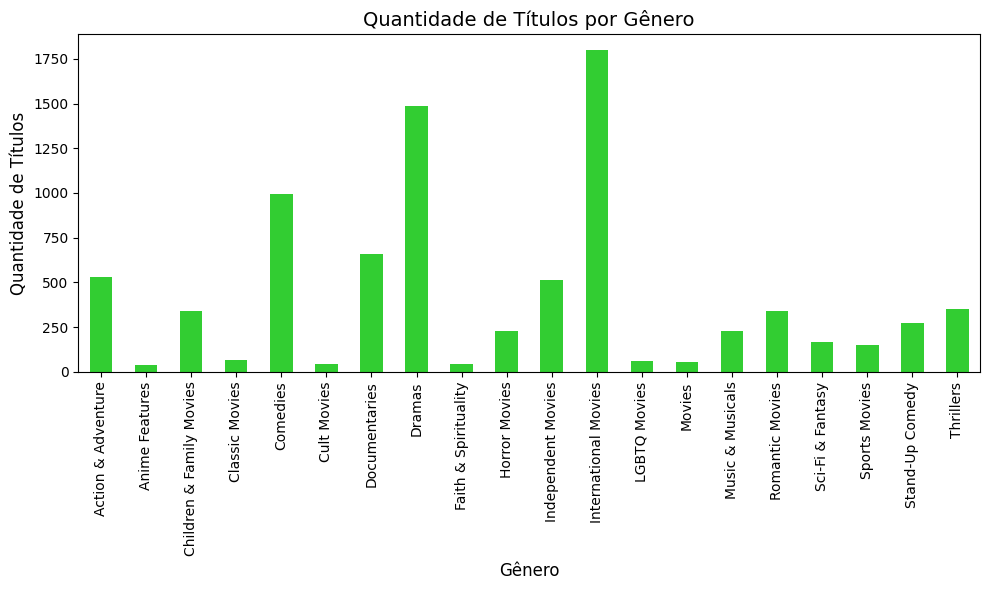

In [31]:
plt.figure(figsize=(10, 6))
df_contagem_generos.plot(kind='bar', color='limegreen')
plt.title('Quantidade de Títulos por Gênero', fontsize=14)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Quantidade de Títulos', fontsize=12)
plt.tight_layout()
plt.show()

● Criar um histograma para analisar a distribuição da duração dos
filmes.

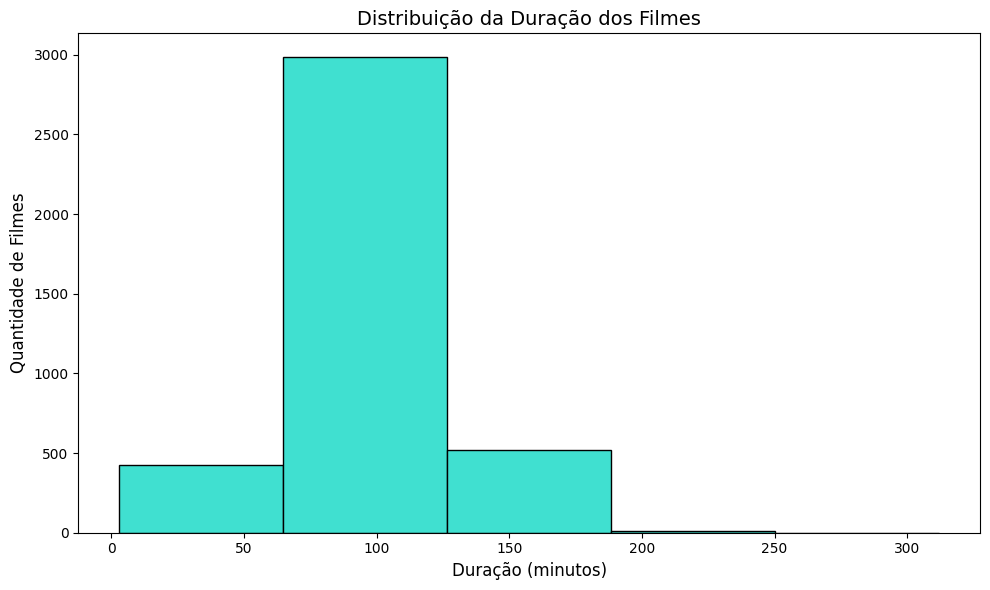

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(df_filmes['duration'], bins=5, color='turquoise', edgecolor='black')
plt.title('Distribuição da Duração dos Filmes', fontsize=14)
plt.xlabel('Duração (minutos)', fontsize=12)
plt.ylabel('Quantidade de Filmes', fontsize=12)
plt.tight_layout()
plt.show()

Atividade extra:

● Quais são os 5 países que possuem mais produções no catálogo?

In [32]:
# valores ausentes
df_netflix.isnull().sum()

,0
show_id,0
title,0
director,1901
cast,556
country,427
date_added,642
release_year,0
rating,10
duration,0
listed_in,0


In [33]:
# retirando os dados faltantes
df_netlix_sem_na = df_netflix['country'].dropna()
df_netlix_sem_na

,country
0,South Korea
2,India
3,"France, Senegal, Belgium"
4,"Canada, United Kingdom"
5,Nigeria
...,...
5832,United States
5833,United States
5834,Denmark
5835,United States


In [34]:
# mostrando a contagem dos países sem os faltantes
df_pais_contagem = df_netlix_sem_na.value_counts()
df_pais_contagem

,count
country,
United States,1907
India,697
United Kingdom,336
Japan,168
Canada,139
...,...
"Norway, Denmark, Netherlands, Sweden",1
"Ireland, United Kingdom, Greece, France, Netherlands",1
"Israel, Germany",1


In [35]:
# top 5 países
df_top_5_paises = df_pais_contagem.head(5)
df_top_5_paises

,count
country,
United States,1907
India,697
United Kingdom,336
Japan,168
Canada,139
